In [0]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## 讀入Fashion MNIST數據

In [0]:
from tensorflow.keras.datasets import fashion_mnist

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


## 看數據


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
len(x_train)

60000

In [6]:
len(x_test)

10000

這是 Trouser


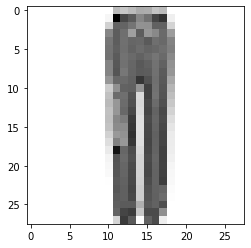

In [7]:
n = 1000
print('這是', class_names[y_train[n]])
plt.imshow(x_train[n], cmap='Greys');

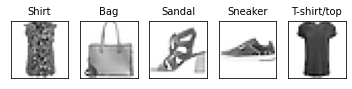

In [8]:
pick = np.random.choice(60000, 5, replace=False)

for i in range(5):
    n = pick[i]
    ax = plt.subplot(151+i)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(class_names[y_train[n]], fontsize=10)
    plt.imshow(x_train[n], cmap='Greys')  

In [9]:
x_train.shape

(60000, 28, 28)

In [0]:
x_train = x_train/255
x_test = x_test/255

In [0]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [12]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
y_train[8] #test

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

## 打造神經網路

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [0]:
model = Sequential()

In [0]:
model.add(Dense(150,input_dim=784,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dense(10,activation='softmax'))

## 組裝神經網路

In [17]:
model.compile(loss='mse', optimizer=SGD(lr=0.087), metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 150)               117750    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               15100     
_________________________________________________________________
dense_2 (Dense)              (None, 500)               50500     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5010      
Total params: 188,360
Trainable params: 188,360
Non-trainable params: 0
_________________________________________________________________


In [18]:
one = model.fit(x_train, y_train, validation_data=(x_test, y_test),batch_size=88, epochs=21) #學習率和訓練次數做更動

Epoch 1/21
682/682 [==============================] - 4s 6ms/step - loss: 0.0803 - accuracy: 0.3900 - val_loss: 0.0626 - val_accuracy: 0.6275
Epoch 2/21
682/682 [==============================] - 4s 6ms/step - loss: 0.0482 - accuracy: 0.6655 - val_loss: 0.0417 - val_accuracy: 0.6823
Epoch 3/21
682/682 [==============================] - 4s 5ms/step - loss: 0.0377 - accuracy: 0.7348 - val_loss: 0.0361 - val_accuracy: 0.7488
Epoch 4/21
682/682 [==============================] - 4s 5ms/step - loss: 0.0324 - accuracy: 0.7893 - val_loss: 0.0314 - val_accuracy: 0.7884
Epoch 5/21
682/682 [==============================] - 3s 5ms/step - loss: 0.0290 - accuracy: 0.8101 - val_loss: 0.0298 - val_accuracy: 0.7998
Epoch 6/21
682/682 [==============================] - 3s 5ms/step - loss: 0.0271 - accuracy: 0.8204 - val_loss: 0.0274 - val_accuracy: 0.8139
Epoch 7/21
682/682 [==============================] - 4s 5ms/step - loss: 0.0257 - accuracy: 0.8270 - val_loss: 0.0264 - val_accuracy: 0.8205
Epoch 

In [22]:
result = model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


訓練成果

第幾筆:5
我的預測是： Trouser , 正確答案： Trouser


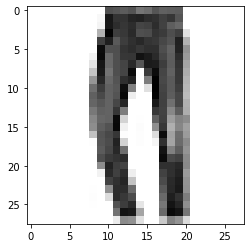

In [24]:
n = eval(input("第幾筆:"))

list=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
for i in range(0,9):
    if y_test[n][i]!=0:
        a=i
print('我的預測是：',list[result[n]],', 正確答案：',list[a])
plt.imshow(x_test[n].reshape(28,28),cmap='Greys');

神經網路預測： 5


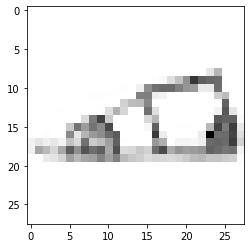

In [25]:
n=5781
print('神經網路預測：',result[n])
plt.imshow(x_test[n].reshape(28,28),cmap='Greys')